<a href="https://colab.research.google.com/github/wereign/aera-vera-keras-nathu-geras/blob/main/GANS!.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Section  
Working only on a single digit for now

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from tensorflow.keras.datasets import mnist

In [5]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


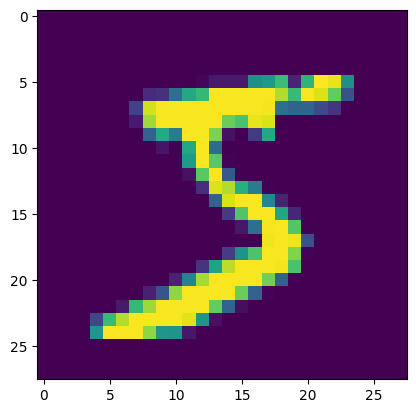

In [6]:
plt.imshow(X_train[0])

In [7]:
y_train[0]

5

In [8]:
# filtering out the images where the label is 0
only_zeros = X_train[y_train==0]

In [9]:
only_zeros.shape

(5923, 28, 28)

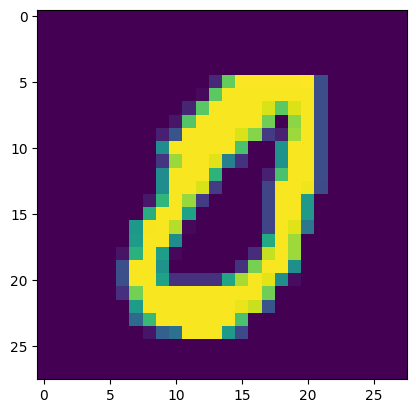

In [11]:
plt.imshow(only_zeros[10])

# Creating the model!

The model will have 2 smaller pieces

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Reshape,Flatten
import tensorflow as tf

## Discriminator

In [14]:
discriminator = Sequential()
discriminator.add(Flatten(input_shape=[28,28]))
discriminator.add(Dense(150,activation='relu'))
discriminator.add(Dense(100,activation='relu'))
# output layer
discriminator.add(Dense(1,activation='sigmoid'))

discriminator.compile(loss='binary_crossentropy',optimizer='adam')

In [15]:
codings_size = 100

generator = Sequential()
generator.add(Dense(100,activation='relu',input_shape=[codings_size]))
generator.add(Dense(150,activation='relu'))
generator.add(Dense(784,activation='relu'))
generator.add(Reshape([28,28]))


we don't compile the generator, since its only training through the gan model.

In [16]:
GAN = Sequential([generator,discriminator])

In [17]:
discriminator.trainable = False

In [35]:
GAN.compile(loss='binary_crossentropy',optimizer='adam')

# Training batches

In [36]:
batch_size = 32

In [37]:
dataset = only_zeros

In [38]:
dataset = tf.data.Dataset.from_tensor_slices(dataset).shuffle(buffer_size=1000)

In [39]:
type(dataset)

tensorflow.python.data.ops.shuffle_op._ShuffleDataset

In [40]:
dataset = dataset.batch(batch_size,drop_remainder=True).prefetch(1)

In [57]:
epochs = 5

In [58]:
GAN.layers[0].layers

In [59]:
GAN.layers[1].layers

In [60]:
generator, discriminator = GAN.layers

In [61]:
for epoch in range(epochs):

  print(f"Currently on epoch: {epoch+1}")

  i = 0

  for X_batch in dataset:

    i += 1
    if i%100 == 0:
      print(f"\tCurrently on batch number: {i}")

    # Discriminator training phase

    noise = tf.random.normal(shape=[batch_size,codings_size])

    gen_images = generator(noise) # generator is making images from this noise

    X_fake_vs_real = tf.concat([gen_images,
                                tf.dtypes.cast(X_batch,tf.float32)],
                               axis=0)
    
    y1 = tf.constant([[0.0]]*batch_size + [[1.0]]*batch_size)

    discriminator.trainable = True

    discriminator.train_on_batch(X_fake_vs_real,y1)


    # TRAIN GENERATOR
    noise = tf.random.normal(shape=[batch_size,codings_size])
    y2 = tf.constant([[1.0]]*batch_size)

    discriminator.trainable = False
    GAN.train_on_batch(noise,y2)


Currently on epoch: 1
	Currently on batch number: 100
Currently on epoch: 2
	Currently on batch number: 100
Currently on epoch: 3
	Currently on batch number: 100
Currently on epoch: 4
	Currently on batch number: 100
Currently on epoch: 5
	Currently on batch number: 100


In [62]:
[[0.0]]*batch_size + [[1.0]]*batch_size

[[0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0]]

In [63]:
noise = tf.random.normal(shape=[10,codings_size])

In [64]:
noise.shape

TensorShape([10, 100])

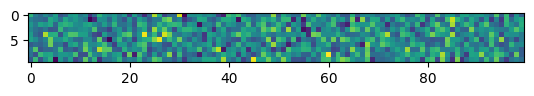

In [65]:
plt.imshow(noise)

In [66]:
images = generator(noise)

In [67]:
images.shape

TensorShape([10, 28, 28])

In [68]:
images[0]

<tf.Tensor: shape=(28, 28), dtype=float32, numpy=
array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0. 

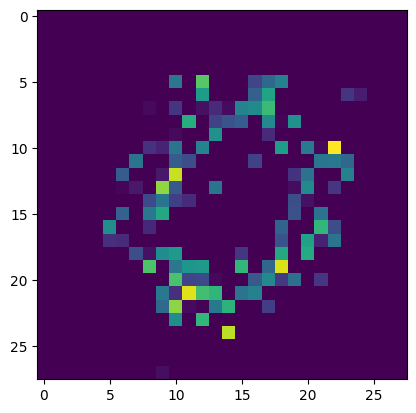

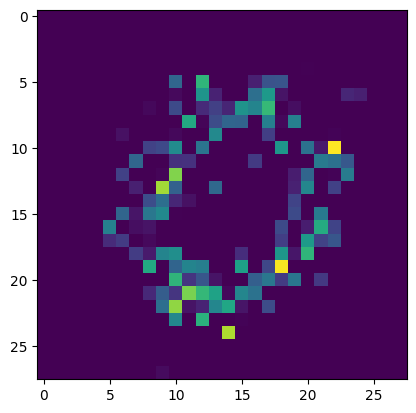

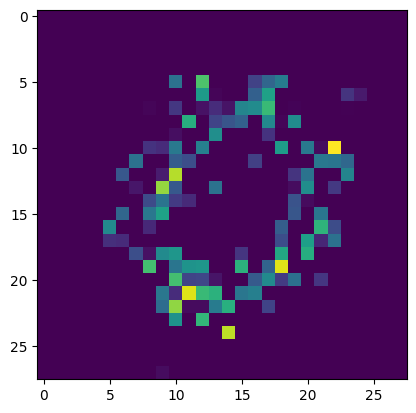

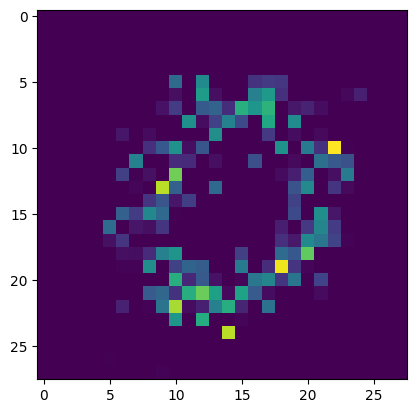

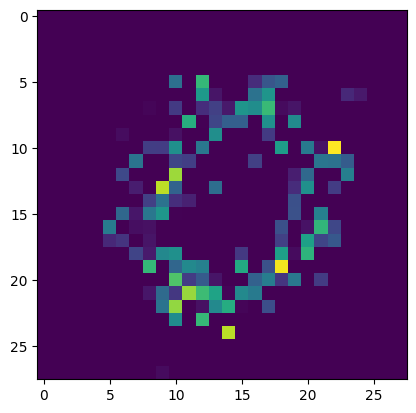

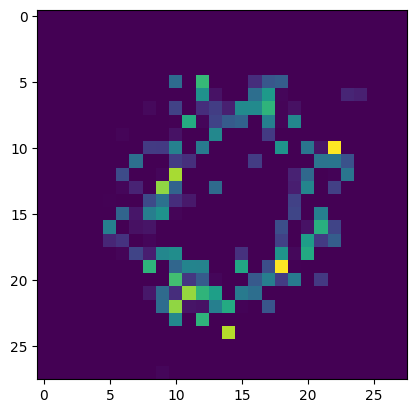

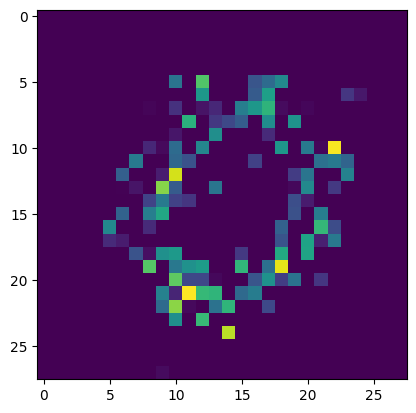

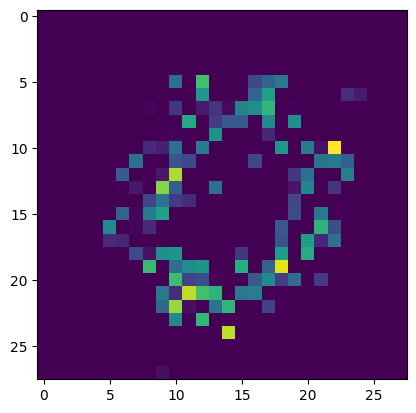

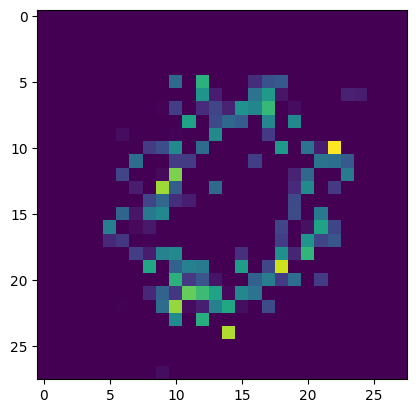

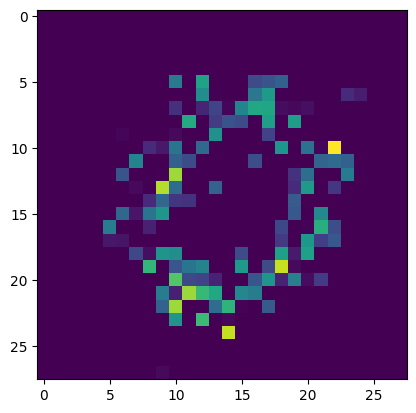

In [69]:
for i in range(10):
  plt.imshow(images[i])
  plt.show()

This is mode collapse